In [3]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage import measure, morphology, filters
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

2.1

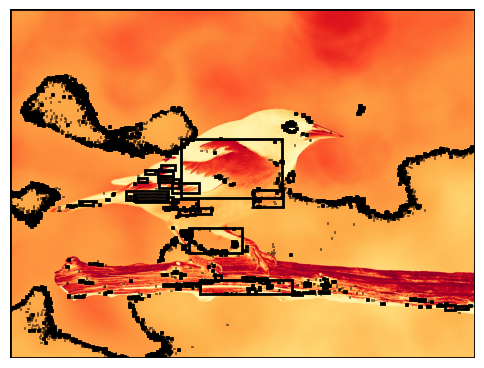

In [10]:
data = Image.open('bird.png').convert('L')
a = np.asarray(data)
thres = filters.threshold_otsu(a)
b = a > thres
c = morphology.label(b)
c1 = Image.fromarray(c)
iio.imsave('bird_labelled.png', c1)
properties = ['Area', 'Centroid', 'BoundingBox']
d = measure.regionprops(c)
fix, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(a, cmap='YlOrRd')

for i in d:
    lr, lc, ur, uc = i['BoundingBox']
    rec_width = uc - lc
    rec_height = ur - lr
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height, fill=False, edgecolor='black', linewidth=2)
    ax.add_patch(rect)
    
plt.axis('off')
plt.show()

2.2

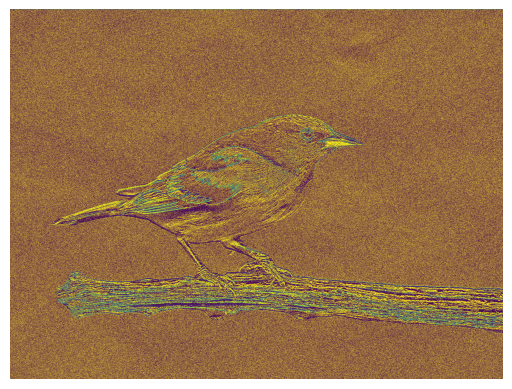

In [11]:
data = Image.open('bird.png').convert('L')
bmg = abs(data - nd.shift(data, (1, 0), order=0))
plt.imshow(bmg, cmap='gray')
plt.axis('off')
plt.imshow(bmg)
plt.show()

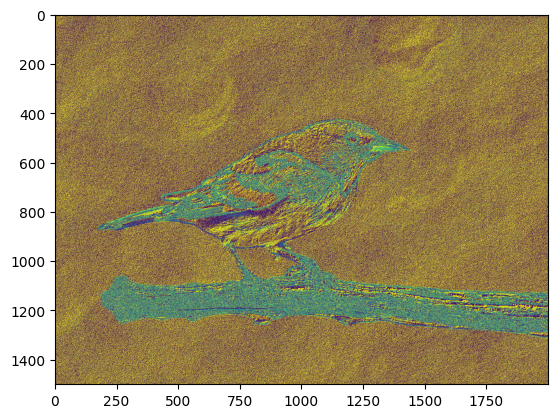

In [12]:
a = nd.sobel(data, axis=0)
b = nd.sobel(data, axis=1)
bmg = abs(a) + abs(b)
plt.imshow(bmg)
plt.show()

2.4

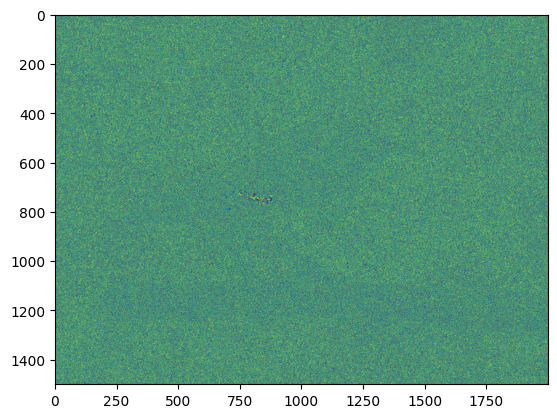

In [13]:
def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, axis=0)
    y = nd.sobel(indata, axis=1)
    x1 = x**2
    y1 = y**2
    xy = abs(x * y)
    x1 = nd.gaussian_filter(x1, sigma=3)
    y1 = nd.gaussian_filter(y1, sigma=3)
    xy = nd.gaussian_filter(xy, sigma=3)
    
    detC = x1 * y1 - xy*2
    trC = x1 + y1
    R = detC - alpha * trC**2
    return R    

bmg = Harris(data)
plt.imshow(bmg)
plt.show()

2.5

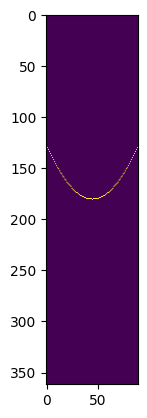

In [14]:
def lineHough(indata, gamma):
    V, H = data.shape
    R = int(np.sqrt(V**2 + H**2))
    ho = np.zeros((R, 90), float)
    W = data+0
    ok = 1
    theta = np.arange(90)/180 *np.pi
    tp = np.arange(90).astype(float)
    while ok:
        mx = W.max()
        if mx < gamma:
            ok = 0
        else:
            v,h = divmod(W.argmax(), H)
            y = V-v 
            x = h 
            rh = x*np.cos(theta) + y*np.sin(theta)
            for i in range(len(rh)):
                if 0<= rh[i] < R and 0<= tp[i] < 90:
                    ho[int(rh[i]), int(tp[i])] += mx
            W[v,h] = 0
    return ho

data = np.zeros((256,256))
data[128, 128] = 1
bmg = lineHough(data, 0.5)
plt.imshow(bmg)
plt.show()